## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


### EDA

In [4]:
# 수치형 변수
numeric_variables = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

In [5]:
description = df[numeric_variables].describe()
print(description)

                Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean      41.970982     31.994827        15.080234       5.400690   
std       13.924911     17.098234         8.816470       3.114005   
min       18.000000      1.000000         1.000000       0.000000   
25%       30.000000     18.000000         7.000000       3.000000   
50%       42.000000     33.000000        15.000000       6.000000   
75%       54.000000     47.000000        23.000000       8.000000   
max       65.000000     60.000000        30.000000      10.000000   

       Payment Delay   Total Spend  Last Interaction  
count   64374.000000  64374.000000      64374.000000  
mean       17.133952    541.023379         15.498850  
std         8.852211    260.874809          8.638436  
min         0.000000    100.000000          1.000000  
25%        10.000000    313.000000          8.000000  
50%        19.000000    534.000000         15.00

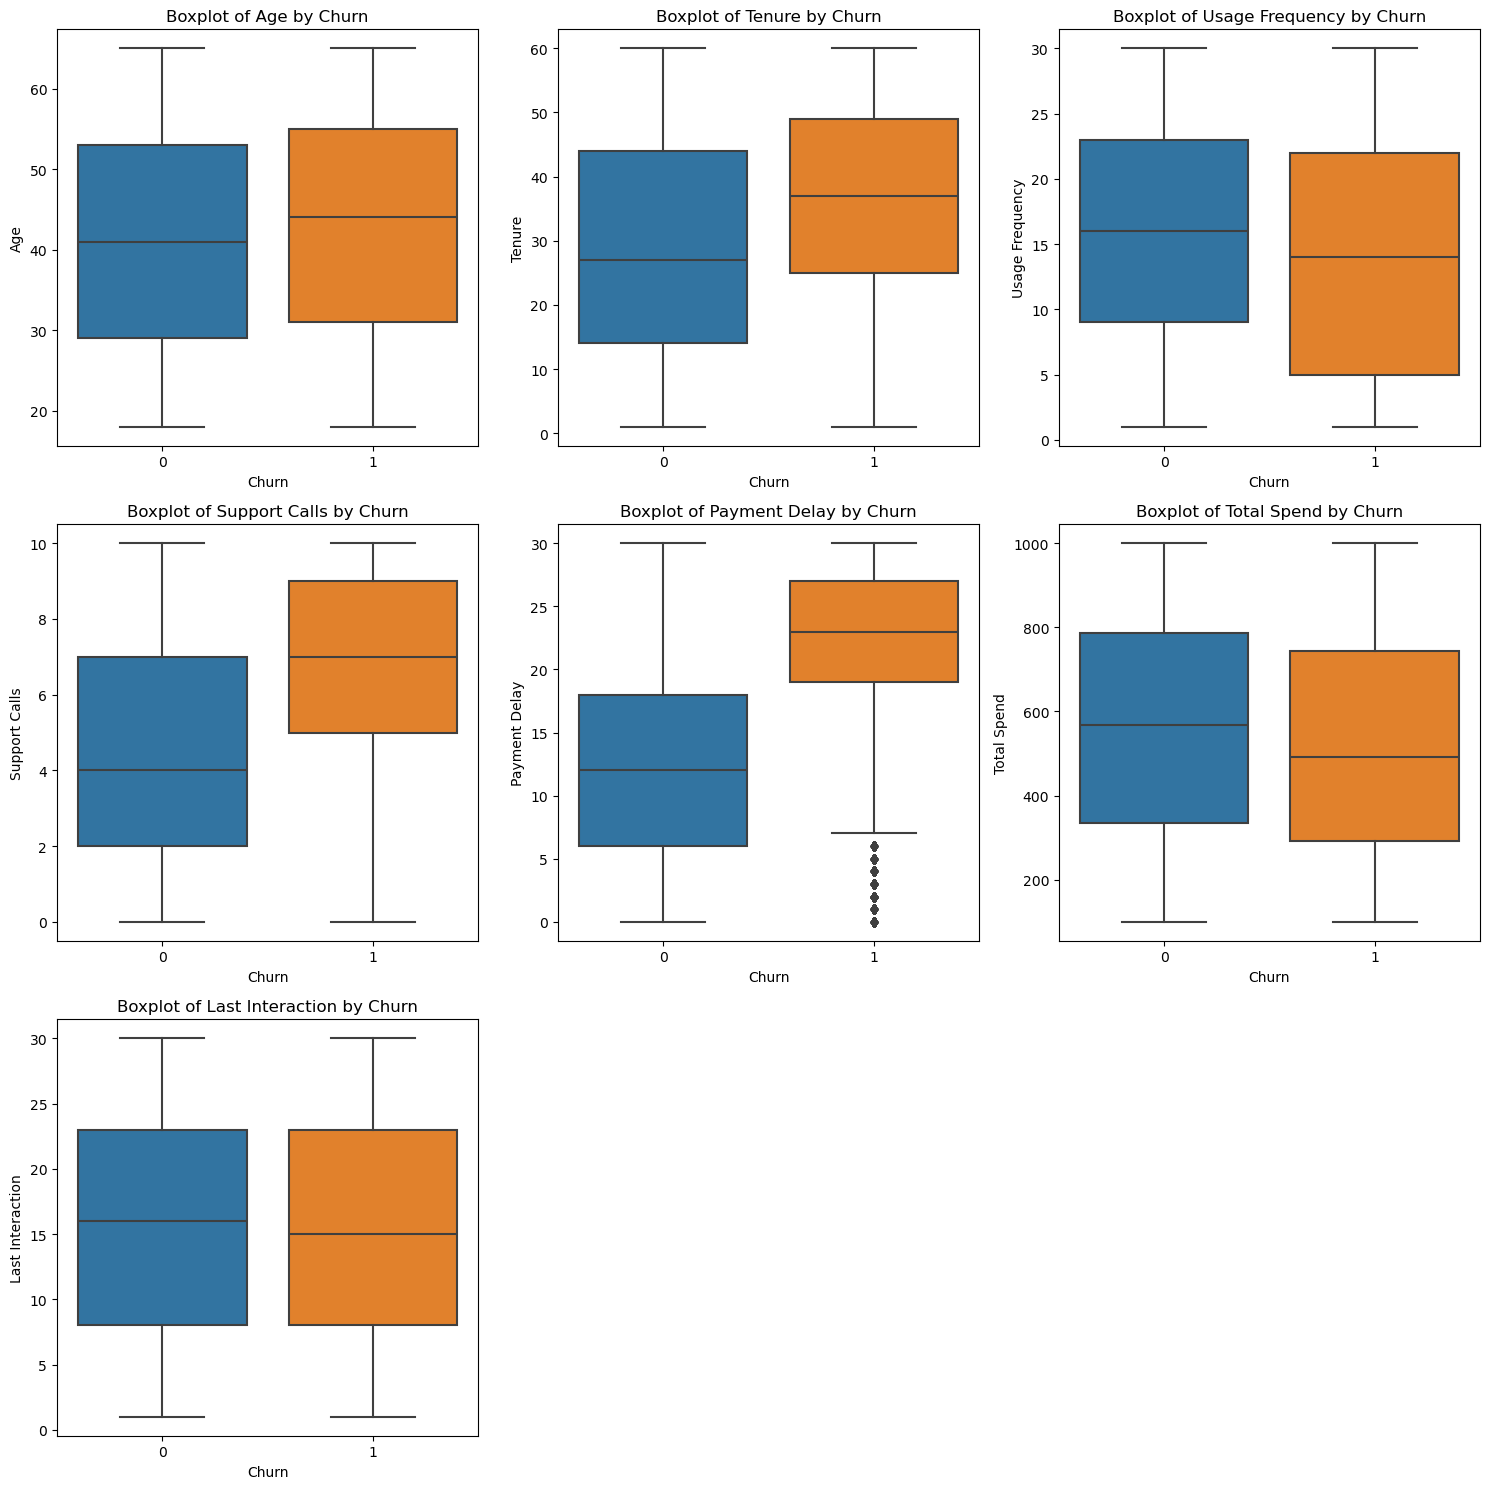

In [6]:
# 수치형 변수 시각화
n_cols = 3
n_rows = 3

plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_variables, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'Boxplot of {column} by Churn')

plt.tight_layout()
plt.show()

-> churn 비율이 다른 변수에 비해 patment delay와 support calls에 따라 많이 달라지는 것을 알 수 있음

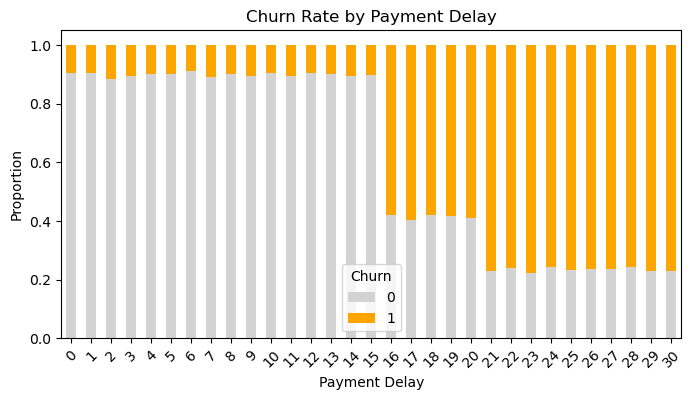

In [7]:
# Payment Delay에 따른 churn 비율 계산
rate = df.groupby('Payment Delay')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# 시각화
plt.figure(figsize=(8, 4))
rate.plot(kind='bar', stacked=True, color=['lightgrey', 'orange'], ax=plt.gca())

plt.title('Churn Rate by Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['0', '1'])
plt.show()

-> payment delay 변수에서는 15를 기점으로 이탈 비율이 높아짐

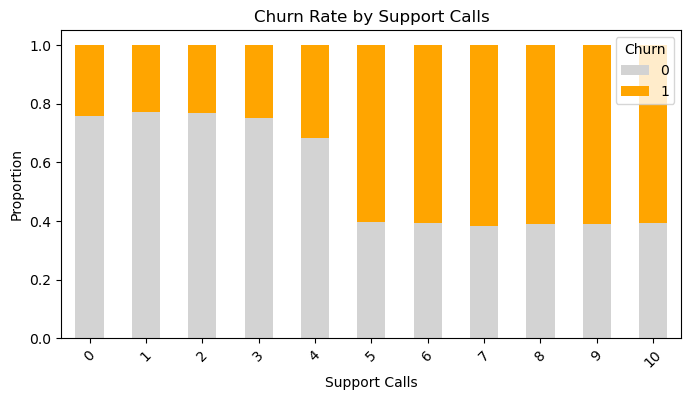

In [8]:
# Support Calls에 따른 churn 비율 계산
rate = df.groupby('Support Calls')['Churn'].value_counts(normalize=True).unstack().fillna(0)

# 시각화
plt.figure(figsize=(8, 4))
rate.plot(kind='bar', stacked=True, color=['lightgrey', 'orange'], ax=plt.gca())

plt.title('Churn Rate by Support Calls')
plt.xlabel('Support Calls')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['0', '1'])
plt.show()

-> Support Calls에서는 4를 기점으로 이탈 비율이 높아짐

In [9]:
# object 변수
object_variables = ['Gender', 'Subscription Type', 'Contract Length']

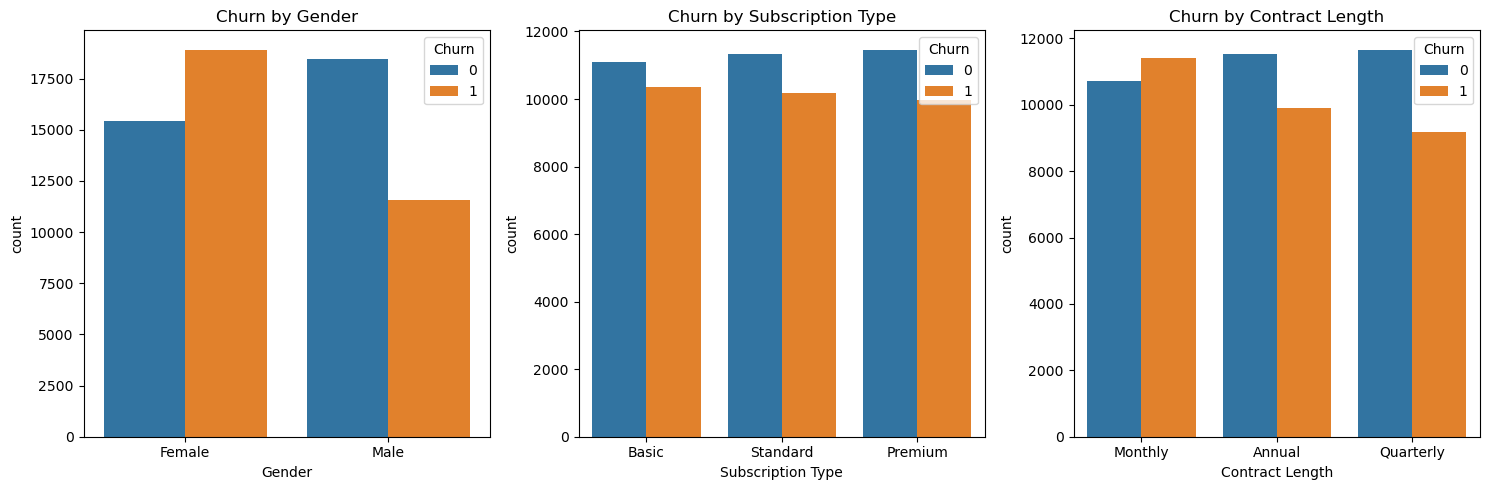

In [10]:
# 시각화 설정
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gender
sns.countplot(data=df, x='Gender', hue='Churn', ax=axes[0])
axes[0].set_title('Churn by Gender')
axes[0].legend(title='Churn', labels=['0', '1'])

# Subscription Type
sns.countplot(data=df, x='Subscription Type', hue='Churn', ax=axes[1])
axes[1].set_title('Churn by Subscription Type')
axes[1].legend(title='Churn', labels=['0', '1'])

# Contract Length
sns.countplot(data=df, x='Contract Length', hue='Churn', ax=axes[2])
axes[2].set_title('Churn by Contract Length')
axes[2].legend(title='Churn', labels=['0', '1'])

plt.tight_layout()
plt.show()

-> female인 경우, contract length가 monthly인 경우 churn 비율이 높았음

### 전처리

In [11]:
# customer ID drop
df.drop(['CustomerID'], axis=1, inplace=True)

In [12]:
# object 변수 타겟인코딩
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=object_variables)
df_encoded = encoder.fit_transform(df[object_variables], df['Churn'])

# 원본 데이터프레임과 합치기
df_final = pd.concat([df.drop(columns=object_variables), df_encoded], axis=1)

In [13]:
df_final

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender,Subscription Type,Contract Length
0,22,25,14,4,27,598,9,1,0.550490,0.482775,0.516087
1,41,28,28,7,13,584,20,0,0.550490,0.473305,0.516087
2,47,27,10,2,29,757,21,0,0.385797,0.464964,0.462167
3,35,9,12,5,17,232,18,0,0.385797,0.464964,0.440482
4,53,58,24,9,2,533,18,0,0.550490,0.473305,0.462167
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,33,12,6,21,947,14,1,0.550490,0.482775,0.440482
64370,37,6,1,5,22,923,9,1,0.385797,0.473305,0.462167
64371,25,39,14,8,30,327,20,1,0.385797,0.464964,0.516087
64372,50,18,19,7,22,540,13,1,0.550490,0.473305,0.516087


### 예측

In [14]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split

y = df_final['Churn']
x = df_final.drop(columns=['Churn'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42, stratify=y)

print('x_train_shape', x_train.shape)
print('x_test_shape', x_test.shape)
print('y_train_shape', y_train.shape)
print('y_test_shape', y_test.shape)

x_train_shape (54717, 10)
x_test_shape (9657, 10)
y_train_shape (54717,)
y_test_shape (9657,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
### 로지스틱 회귀
lr = LogisticRegression()
lr.fit(x_train, y_train)

/Users/rynn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# 예측
y_pred = lr.predict(x_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.8077042559801181
Confusion Matrix:
[[4107  976]
 [ 881 3693]]


In [18]:
### 랜덤포레스트
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
# 예측
y_pred = rf.predict(x_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 결과 출력
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9990680335507922
Confusion Matrix:
[[5080    3]
 [   6 4568]]


-> 기본적인 전처리와 모델만으로 성능이 충분히 높게 나와서 따로 구간을 나누거나 다른 전처리를 하지 않았음.. 선형 관계를 가지지 않는 변수가 있다보니 확실히 랜덤 포레스트 성능이 더 높게 나온 것 같음